# Linearly Weighted Moving Average 

https://www.investopedia.com/terms/l/linearlyweightedmovingaverage.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'itc.ns'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,238.600006,238.600006,237.100006,238.100006,202.353333,4208837
2020-01-02 00:00:00+05:30,238.199997,240.949997,238.100006,239.850006,203.840607,8402979
2020-01-03 00:00:00+05:30,241.000000,241.000000,238.000000,238.500000,202.693268,9284478
2020-01-06 00:00:00+05:30,237.500000,238.300003,235.000000,235.100006,199.803726,7636617
2020-01-07 00:00:00+05:30,236.050003,237.899994,234.600006,235.350006,200.016220,8416741


In [3]:
def linear_weight_moving_average(close, n):
    lwma = [np.nan] * n
    for i in range(n, len(close)):
        lwma.append((close[i - n : i] * (np.arange(n) + 1)).sum()/(np.arange(n + 1).sum()))
    return lwma

In [4]:
df['LWMA'] = linear_weight_moving_average(df['Adj Close'], 5)

In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,LWMA
Date,,,,,,,
2020-01-01 00:00:00+05:30,238.600006,238.600006,237.100006,238.100006,202.353333,4208837,NaN
2020-01-02 00:00:00+05:30,238.199997,240.949997,238.100006,239.850006,203.840607,8402979,NaN
2020-01-03 00:00:00+05:30,241.000000,241.000000,238.000000,238.500000,202.693268,9284478,NaN
2020-01-06 00:00:00+05:30,237.500000,238.300003,235.000000,235.100006,199.803726,7636617,NaN
2020-01-07 00:00:00+05:30,236.050003,237.899994,234.600006,235.350006,200.016220,8416741,NaN
2020-01-08 00:00:00+05:30,234.000000,235.800003,233.250000,234.199997,199.038849,7043211,201.160690
2020-01-09 00:00:00+05:30,235.600006,236.600006,235.050003,235.800003,200.398651,9452653,200.259830
2020-01-10 00:00:00+05:30,237.600006,238.750000,236.800003,238.000000,202.268326,9973746,200.033202
2020-01-13 00:00:00+05:30,238.500000,240.500000,238.250000,239.250000,203.330688,12243639,200.659263


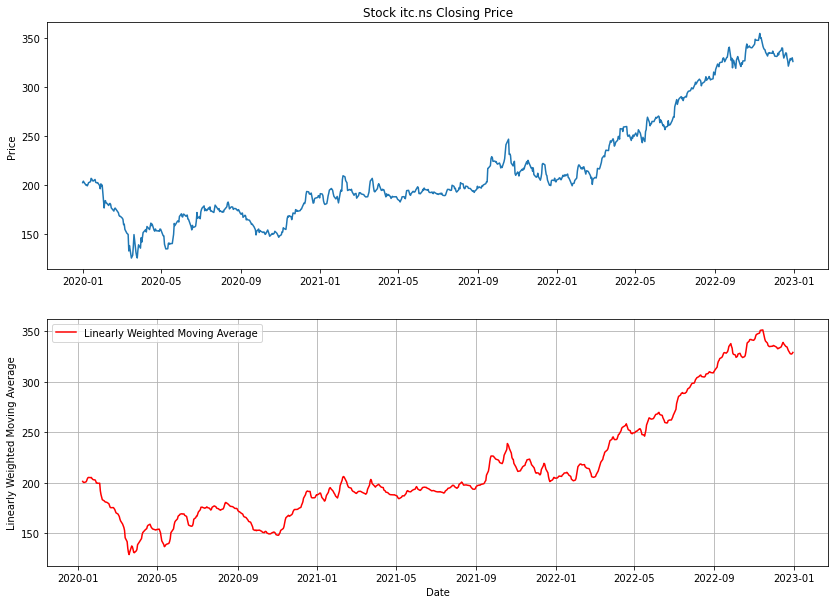

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['LWMA'], label='Linearly Weighted Moving Average', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
#ax2.axhline(y=0.5, color='darkblue')
#ax2.axhline(y=-0.5, color='darkblue')
ax2.grid()
ax2.set_ylabel('Linearly Weighted Moving Average')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Linearly Weighted Moving Average 

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,LWMA,VolumePositive
0,18261.770833,238.600006,238.600006,237.100006,238.100006,202.353333,4208837,NaN,False
1,18262.770833,238.199997,240.949997,238.100006,239.850006,203.840607,8402979,NaN,False
2,18263.770833,241.000000,241.000000,238.000000,238.500000,202.693268,9284478,NaN,False
3,18266.770833,237.500000,238.300003,235.000000,235.100006,199.803726,7636617,NaN,False
4,18267.770833,236.050003,237.899994,234.600006,235.350006,200.016220,8416741,NaN,False


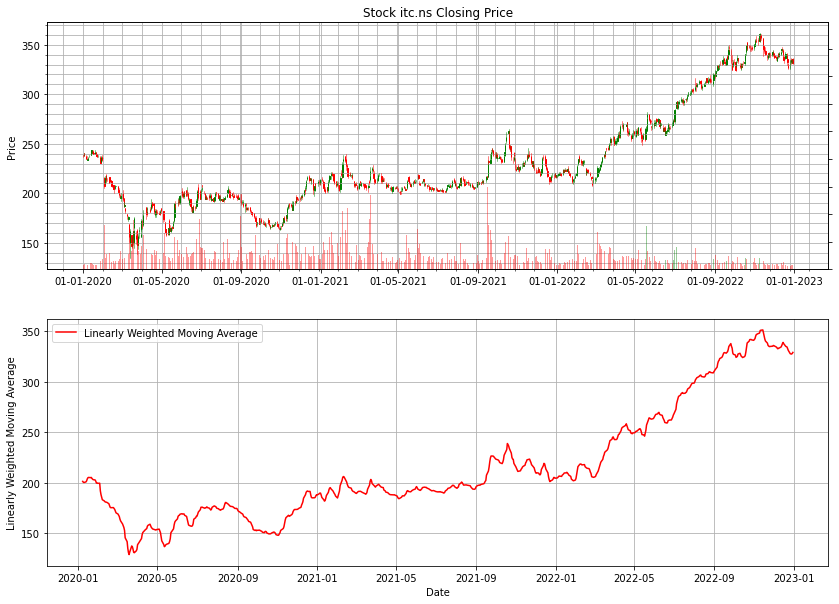

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['LWMA'], label='Linearly Weighted Moving Average', color='red')
ax2.grid()
ax2.set_ylabel('Linearly Weighted Moving Average')
ax2.set_xlabel('Date')
ax2.legend(loc='best')